In [1]:
import sys
sys.path.append('../../build')

In [2]:
import time

In [3]:
import numpy as np
import simpl as MySimplex
from simplicialx.simplicial import SimplicialComplex

In [4]:
games = []

with open("ten_games_bin_matrices.txt", "r") as file:
  games = []
  while True:
    description = file.readline()
    if description == "":
      break
    game = []
    while True:
      move = []
      while True:
        line = file.readline()
        if line == "Next turn\n":
          break
        move.append(list(map(int, line.split())))
      game.append(move)
      next = file.readline()
      if next == "End\n":
        break
    games.append(game)

In [5]:
my_simpl = MySimplex.SimplicialComplex()
other_simpl = SimplicialComplex()

In [6]:
def AddMineSimplex(my_simpl, simplex):
  my_simpl.AddSimplex(simplex)
      
def AddOtherSimplex(other_simpl, simplex):
  other_simpl.add(simplex)
  
def AddMineGame(game_index=0):
  my_simpl = MySimplex.SimplicialComplex()
  
  first_game = games[game_index]
  for move in first_game:
    for figure in move:
      indices = [i for i, x in enumerate(figure) if x == 1]
      if indices != []:
        AddMineSimplex(my_simpl, indices)
  return my_simpl
  
def AddOtherGame(game_index=0):
  other_simpl = SimplicialComplex()
  
  first_game = games[game_index]
  for move in first_game:
    for figure in move:
      indices = [i for i, x in enumerate(figure) if x == 1]
      if indices != []:
        AddOtherSimplex(other_simpl, indices)
  return other_simpl
     

In [7]:
for i, game in enumerate(games):
  print(f"Number of moves in {i}th, game: {len(game)}")

Number of moves in 0th, game: 37
Number of moves in 1th, game: 72
Number of moves in 2th, game: 65
Number of moves in 3th, game: 102
Number of moves in 4th, game: 60
Number of moves in 5th, game: 41
Number of moves in 6th, game: 151
Number of moves in 7th, game: 149
Number of moves in 8th, game: 63
Number of moves in 9th, game: 59


In [8]:
%%time
my_simpl = AddMineGame(0)

CPU times: user 604 ms, sys: 8.59 ms, total: 612 ms
Wall time: 613 ms


In [9]:
%%time
other_simpl = AddOtherGame(0)

CPU times: user 15 s, sys: 27 ms, total: 15 s
Wall time: 15.1 s


In [10]:
my_simpl.FVector()

[(0, 56),
 (1, 600),
 (2, 2131),
 (3, 4994),
 (4, 9333),
 (5, 14221),
 (6, 17635),
 (7, 17730),
 (8, 14390),
 (9, 9362),
 (10, 4822),
 (11, 1925),
 (12, 575),
 (13, 121),
 (14, 16),
 (15, 1)]

In [11]:
other_simpl.f_vector

array([   56,   600,  2131,  4994,  9333, 14221, 17635, 17730, 14390,
        9362,  4822,  1925,   575,   121,    16,     1])

Числа Бетти

In [12]:
my_simpl = AddMineGame(0)

In [13]:
%%time
my_simpl.BettiNumber(1)


CPU times: user 23.8 ms, sys: 1.35 ms, total: 25.2 ms
Wall time: 25.1 ms


8

In [14]:
my_simpl = AddMineGame(0)

In [15]:
%%time
my_simpl.BettiNumber(2)


CPU times: user 1.13 s, sys: 13.8 ms, total: 1.15 s
Wall time: 1.15 s


11

In [16]:
my_simpl = AddMineGame(0)

In [17]:
%%time
my_simpl.BettiNumber(3)

CPU times: user 14.7 s, sys: 145 ms, total: 14.9 s
Wall time: 14.9 s


0

In [18]:
other_simpl = AddOtherGame(0)

In [19]:
%%time
other_simpl.betti_number(1)

CPU times: user 2.77 s, sys: 6.6 ms, total: 2.78 s
Wall time: 2.79 s


8

In [20]:
other_simpl = AddOtherGame(0)

In [21]:
%%time
other_simpl.betti_number(2)

CPU times: user 2min 50s, sys: 98.8 ms, total: 2min 50s
Wall time: 2min 51s


11

In [22]:
other_simpl = AddOtherGame(0)

In [24]:
sys.setrecursionlimit(1000000000)

In [25]:
%%time
other_simpl.betti_number(3)

CPU times: user 37min 7s, sys: 3.81 s, total: 37min 11s
Wall time: 37min 22s


0

Лаплас

k=1

In [26]:
my_simpl = AddMineGame(0)

In [27]:
%%time 
S = my_simpl.LaplacianMatrix(1, 0, 2, False)

CPU times: user 114 ms, sys: 8.78 ms, total: 123 ms
Wall time: 36 ms


In [28]:
other_simpl = AddOtherGame(0)

In [29]:
%%time 
other_simpl.laplace_matrix(1).shape

CPU times: user 189 ms, sys: 7.1 ms, total: 196 ms
Wall time: 90.7 ms


(600, 600)

k=2

In [30]:
my_simpl = AddMineGame(0)

In [31]:
%%time 
S = my_simpl.LaplacianMatrix(2, 1, 3, False)

CPU times: user 2.5 s, sys: 49.1 ms, total: 2.55 s
Wall time: 433 ms


In [32]:
other_simpl = AddOtherGame(0)

In [33]:
%%time 
other_simpl.laplace_matrix(2).shape

CPU times: user 1.86 s, sys: 53.5 ms, total: 1.91 s
Wall time: 776 ms


(2131, 2131)

k=3

In [34]:
my_simpl = AddMineGame(0)

In [35]:
%%time 
S = my_simpl.LaplacianMatrix(3, 2, 4, False)

CPU times: user 16 s, sys: 425 ms, total: 16.4 s
Wall time: 2.77 s


In [36]:
other_simpl = AddOtherGame(0)

In [37]:
%%time 
other_simpl.laplace_matrix(3).shape

CPU times: user 14.6 s, sys: 303 ms, total: 14.9 s
Wall time: 5.04 s


(4994, 4994)

k=3, p=1, q=5

In [38]:
my_simpl = AddMineGame(0)

In [39]:
%%time 
S = my_simpl.LaplacianMatrix(3, 1, 5, False)

CPU times: user 20.2 s, sys: 597 ms, total: 20.8 s
Wall time: 3.58 s


In [40]:
other_simpl = AddOtherGame(0)

In [41]:
%%time 
other_simpl.laplace_matrix(k=3, p=2, q=2).shape

CPU times: user 34.5 s, sys: 401 ms, total: 34.9 s
Wall time: 22.7 s


(4994, 4994)

k=5, p=3, q=7

In [42]:
my_simpl = AddMineGame(0)

In [43]:
%%time 
S = my_simpl.LaplacianMatrix(5, 3, 7, False)

CPU times: user 2min 53s, sys: 5.55 s, total: 2min 58s
Wall time: 29.7 s


In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time 
other_simpl.laplace_matrix(k=5, p=2, q=2).shape

k=11, p=5, q=13

In [44]:
my_simpl = AddMineGame(0)

In [45]:
%%time 
S = my_simpl.LaplacianMatrix(11, 5, 13, False)

CPU times: user 7.06 s, sys: 1.33 s, total: 8.39 s
Wall time: 4.14 s


In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time 
other_simpl.laplace_matrix(k=11, p=6, q=2).shape

k=11, p=10, q=12

In [46]:
my_simpl = AddMineGame(0)

In [47]:
%%time 
S = my_simpl.LaplacianMatrix(11, 10, 12, False)

CPU times: user 2.65 s, sys: 45.7 ms, total: 2.7 s
Wall time: 447 ms


In [ ]:
len(S)

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time 
other_simpl.laplace_matrix(k=11, p=1, q=1).shape

Boundary

k=6, p=5

In [48]:
my_simpl = AddMineGame(0)

In [49]:
%%time
tmp = np.array(my_simpl.BoundaryMatrix(6, 5))
tmp.shape

CPU times: user 8.32 s, sys: 953 ms, total: 9.27 s
Wall time: 9.54 s


(14221, 17635)

In [28]:
other_simpl = AddOtherGame(0)

In [29]:
%%time
tmp = np.array(other_simpl.boundary_operator_matrix(6, 1))
tmp.shape


CPU times: user 23.2 s, sys: 3.16 s, total: 26.4 s
Wall time: 27.9 s


(14221, 17635)

k=8, p=4

In [50]:
my_simpl = AddMineGame(0)

In [51]:
%%time
tmp = np.array(my_simpl.BoundaryMatrix(8, 4))
tmp.shape

CPU times: user 4.93 s, sys: 418 ms, total: 5.35 s
Wall time: 5.46 s


(9333, 14390)

In [ ]:
other_simpl = AddOtherGame(0)

In [ ]:
%%time
tmp = np.array(other_simpl.boundary_operator_matrix(8, 4))
tmp.shape


Betweenness


k=1, q=2 (vertices=2d, edge=3d)

In [52]:
my_simpl = AddMineGame(0)

In [53]:
%%time
U=my_simpl.BetweennessAll(1, 2, True)

CPU times: user 2min 18s, sys: 236 ms, total: 2min 18s
Wall time: 15 s


In [36]:
other_simpl = AddOtherGame(0)

In [37]:
%%time
V = other_simpl.simplex_betweenness_centrality(p=1, q=2, weighted=True)

CPU times: user 29.4 s, sys: 37.6 ms, total: 29.4 s
Wall time: 29.7 s


k=1, q=2 (vertices=2d, edge=3d), not weighted

In [23]:
my_simpl = AddMineGame(0)

In [24]:
%%time
V=my_simpl.BetweennessAll(1, 2, False)

CPU times: user 2min 5s, sys: 248 ms, total: 2min 5s
Wall time: 13.9 s


In [25]:
other_simpl = AddOtherGame(0)

In [26]:
%%time
V = other_simpl.simplex_betweenness_centrality(p=1, q=2, weighted=False)

CPU times: user 1.87 s, sys: 4.1 ms, total: 1.87 s
Wall time: 1.82 s


Closeness

In [24]:
my_simpl = AddMineGame(0)

In [27]:
%%time
S=my_simpl.ClosenessAll(2, 4, True)

CPU times: user 9.97 s, sys: 26.9 ms, total: 10 s
Wall time: 1.12 s


In [21]:
other_simpl = AddOtherGame(0)

In [23]:
%%time
V = other_simpl.simplex_closeness_centrality(p=2, q=4, weighted=False)

CPU times: user 1min, sys: 121 ms, total: 1min
Wall time: 59.3 s


asdf


In [8]:
def LaplMine(k, p, q, w):
  my_simpl = AddMineGame(0)
  start = time.time()
  my_simpl.LaplacianMatrix(k, p, q, w)
  end = time.time()
  return end - start

In [9]:
def LaplOther(k, p, q, w):
  other_simpl = AddOtherGame(0)
  start = time.time()
  if w == False:
    other_simpl.laplace_matrix(k, p, q)
  else:
    other_simpl.laplace_matrix_weighted(k, p, q)
  end = time.time()
  return end - start

In [10]:
x = np.arange(start=3, stop=14)

In [11]:
y1 = []
y2 = []

In [12]:
for k in x:
  cur_time = LaplMine(k, k - 2, k + 2, False)
  print(k, cur_time)
  y1.append(cur_time)
  

3 3.1110541820526123
4 11.586480140686035
5 29.381788969039917
6 48.69130182266235
7 48.12745118141174
8 29.2378830909729
9 11.560977935791016
10 2.6106879711151123
11 0.49315619468688965
12 0.033798933029174805
13 0.004458189010620117


In [14]:
for k in x:
  cur_time = LaplOther(k, 2, 2, False)
  print(k, cur_time)
  y2.append(cur_time)
  

3 22.11212706565857
4 74.0863950252533
5 141.93740606307983
6 244.08216619491577
7 415.97249364852905
8 230.6967008113861
9 114.43729901313782
10 54.59015679359436
11 34.30890607833862
12 4.283010005950928
13 0.630958080291748


In [15]:
import matplotlib.pyplot as plt


In [16]:
y1 = [3.1110541820526123, 11.586480140686035, 29.381788969039917, 48.69130182266235, 48.12745118141174, 29.2378830909729, 11.560977935791016, 2.6106879711151123, 0.49315619468688965, 0.033798933029174805, 0.004458189010620117]
y2 = [22.11212706565857, 74.0863950252533, 141.93740606307983, 244.08216619491577, 415.97249364852905, 230.6967008113861, 114.43729901313782, 54.59015679359436, 34.30890607833862, 4.283010005950928, 0.630958080291748]

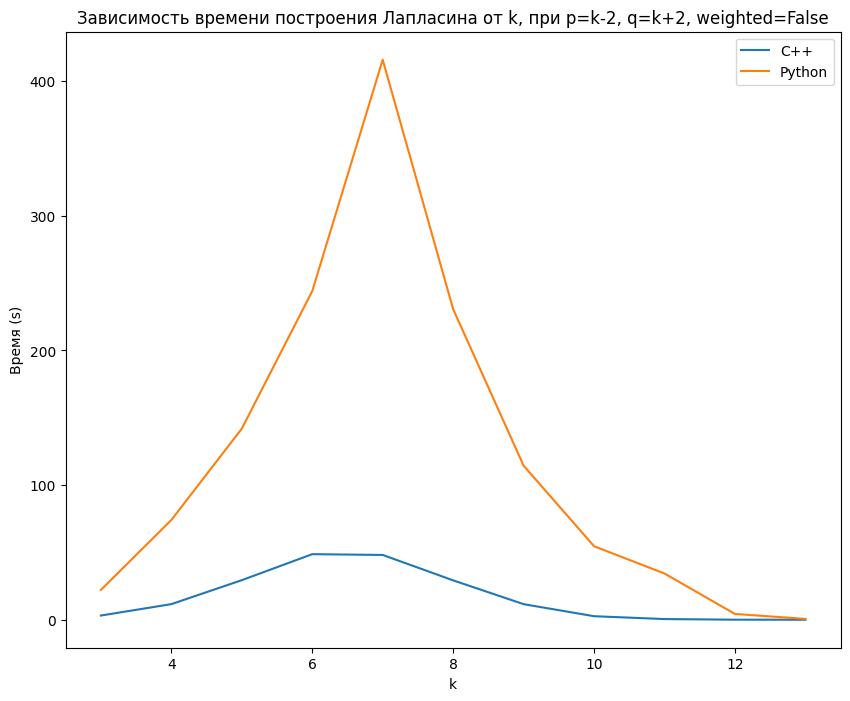

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label ='C++')
plt.plot(x, y2, label ='Python')

plt.xlabel("k")
plt.ylabel("Время (s)")
plt.legend()
plt.title('Зависимость времени построения Лапласина от k, при p=k-2, q=k+2, weighted=False')
plt.show()


In [18]:
y1 = []
y2 = []

In [19]:
for k in x:
  cur_time = LaplMine(k, k - 2, k + 2, True)
  print(k, cur_time)
  y1.append(cur_time)
  

3 5.423238039016724
4 19.25728988647461
5 48.09516978263855
6 77.63880181312561
7 74.74710988998413
8 47.38878083229065
9 19.341917037963867
10 4.155861139297485
11 0.722775936126709
12 0.05752086639404297
13 0.005347251892089844


In [25]:
for k in x:
  cur_time = LaplOther(k, 2, 2, True)
  print(k, cur_time)
  y2.append(cur_time)
  

3 36.27970790863037
4 133.46775579452515
5 282.0338008403778
6 411.0457830429077
7 395.2436089515686
8 383.86784529685974
9 201.51124596595764
10 89.13411712646484
11 31.353326082229614
12 6.321484088897705
13 0.8035547733306885


In [23]:
y1=[5.423238039016724,
 19.25728988647461,
 48.09516978263855,
 77.63880181312561,
 74.74710988998413,
 47.38878083229065,
 19.341917037963867,
 4.155861139297485,
 0.722775936126709,
 0.05752086639404297,
 0.005347251892089844]

In [24]:
y2=[36.27970790863037,
 133.46775579452515,
 282.0338008403778,
 411.0457830429077,
 395.2436089515686,
 383.86784529685974,
 201.51124596595764,
 89.13411712646484,
 31.353326082229614,
 6.321484088897705,
 0.8035547733306885]

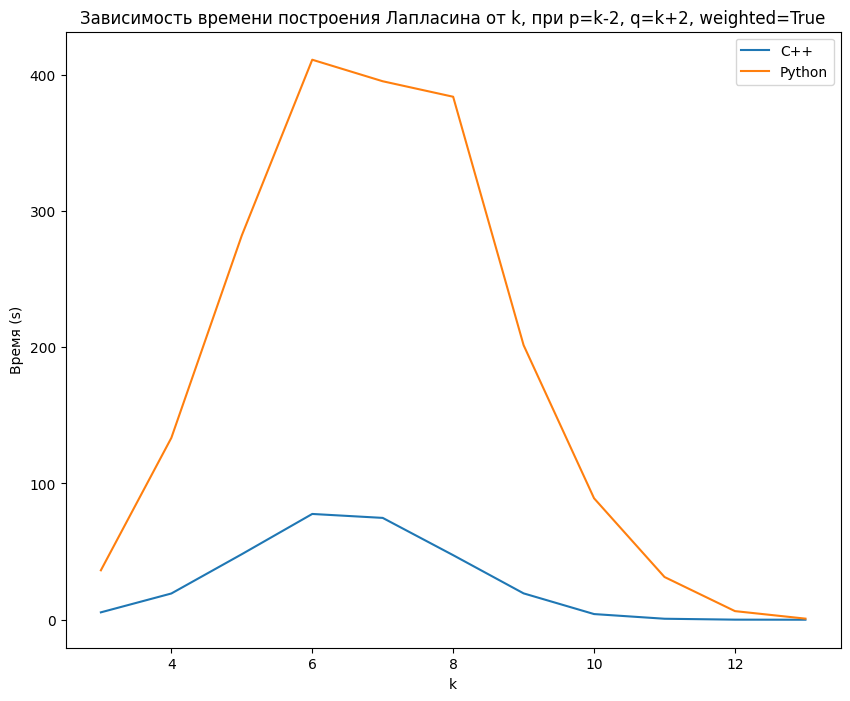

In [25]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label ='C++')
plt.plot(x, y2, label ='Python')

plt.xlabel("k")
plt.ylabel("Время (s)")
plt.legend()
plt.title('Зависимость времени построения Лапласина от k, при p=k-2, q=k+2, weighted=True')
plt.show()


Boundary


In [17]:
x = np.arange(start=2, stop=16)


In [18]:
def BoundMine(k, p):
  my_simpl = AddMineGame(0)
  start = time.time()
  my_simpl.BoundaryMatrix(k, p)
  end = time.time()
  return end - start

In [19]:
def BoundOther(k, p):
  other_simpl = AddOtherGame(0)
  start = time.time()
  other_simpl.boundary_operator_matrix(k, p)
  end = time.time()
  return end - start

In [20]:
for k in x:
  cur_time = BoundMine(k, k - 2)
  print(k, cur_time)
  y1.append(cur_time)
  

2 0.001889944076538086
3 0.025484085083007812
4 0.21400117874145508
5 0.8769898414611816
6 2.169235944747925
7 3.165086030960083
8 3.1581718921661377
9 2.081207036972046
10 0.9234681129455566
11 0.19566798210144043
12 0.03374481201171875
13 0.00521397590637207
14 0.002524137496948242
15 9.393692016601562e-05


In [21]:
for k in x:
  cur_time = BoundOther(k, 2)
  print(k, cur_time)
  y2.append(cur_time)
  

2 0.16742515563964844
3 0.9801530838012695
4 4.622835874557495
5 19.47725200653076
6 66.19969367980957
7 118.82330918312073
8 176.69122195243835
9 96.88126492500305
10 53.33071303367615
11 19.85325002670288
12 4.0754852294921875
13 0.6295428276062012
14 0.0748140811920166
15 0.004664897918701172


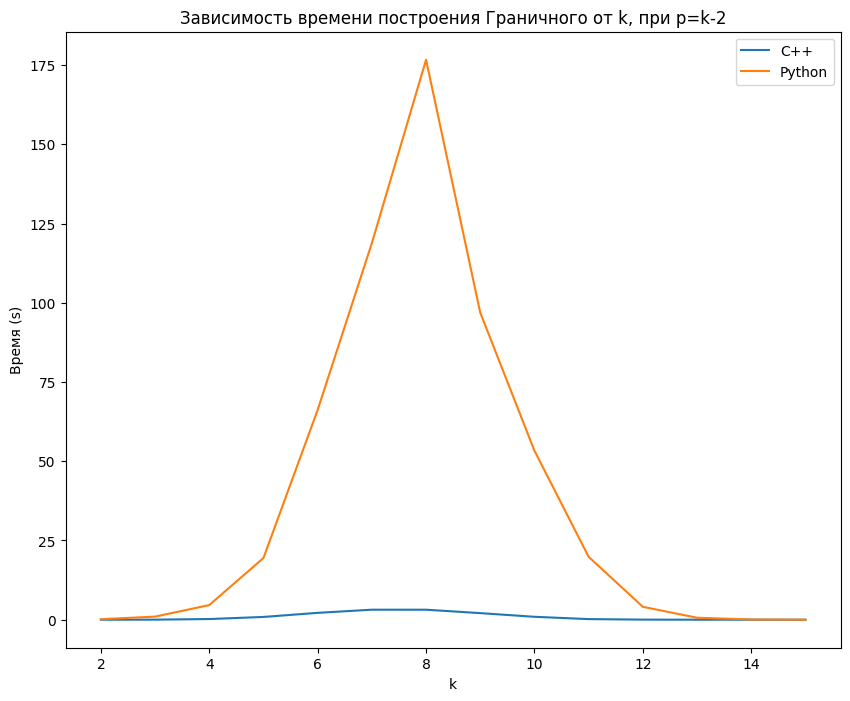

In [25]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label ='C++')
plt.plot(x, y2, label ='Python')

plt.xlabel("k")
plt.ylabel("Время (s)")
plt.legend()
plt.title('Зависимость времени построения Граничного от k, при p=k-2')
plt.show()


Betweness

In [30]:
def BetwMine(p, q, w):
  my_simpl = AddMineGame(0)
  start = time.time()
  my_simpl.BetweennessAll(p, q, w)
  end = time.time()
  return end - start

In [31]:
def BetwOther(p, q, w):
  other_simpl = AddOtherGame(0)
  start = time.time()
  other_simpl.simplex_betweenness_centrality(p, q, w)
  end = time.time()
  return end - start

In [44]:
x = np.arange(start=0, stop=13)

In [45]:
y1 = []
y2 = []

In [11]:
my_simpl.FVector()

[(0, 56),
 (1, 600),
 (2, 2131),
 (3, 4994),
 (4, 9333),
 (5, 14221),
 (6, 17635),
 (7, 17730),
 (8, 14390),
 (9, 9362),
 (10, 4822),
 (11, 1925),
 (12, 575),
 (13, 121),
 (14, 16),
 (15, 1)]

In [15]:
sum(my_simpl.DegreeAll(4, 5))

426630.0

In [46]:
for k in x:
  cur_time = BetwMine(k, k+1, False)
  print(k, cur_time)
  y1.append(cur_time)
  

0 0.005983829498291016


In [ ]:
for k in x:
  cur_time = BetwOther(k, k+1, False)
  print(k, cur_time)
  y2.append(cur_time)
  

In [ ]:
y1

In [ ]:
y2

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label ='C++')
plt.plot(x, y2, label ='Python')

plt.xlabel("k")
plt.ylabel("Время (s)")
plt.legend()
plt.title('Зависимость времени подсчёта betweenness от k, при q=k+1')
plt.show()


In [ ]:
LaplMine(6, 4, 8, True)